In [1]:

import numpy as np
import numpy.matlib as mt
from scipy import signal,stats
import itertools

from ephysvibe.structures.neuron_data import NeuronData
from ephysvibe.structures.spike_data import SpikeData
from ephysvibe.trials import align_trials
from ephysvibe.task import task_constants

import os 
import glob
import pickle
from matplotlib import pyplot as plt

from joblib import Parallel, delayed
from tqdm import tqdm

In [2]:

with open('C:/Users/ibos.g/Documents/Data/INT-Marseille/OpenEphys/Riesling/averaged_structures/sample/LIPavacti', 'rb') as handle:
    lip_av= pickle.load(handle)

with open('C:/Users/ibos.g/Documents/Data/INT-Marseille/OpenEphys/Riesling/averaged_structures/sample/PFCavacti', 'rb') as handle:
    pfc_av= pickle.load(handle)

with open('C:/Users/ibos.g/Documents/Data/INT-Marseille/OpenEphys/Riesling/averaged_structures/sample/V4avacti', 'rb') as handle:
    v4_av= pickle.load(handle)

In [70]:
lip_av[0]['win']

100

In [5]:
maxilip =    np.array(list(np.max(np.mean(lip_av[i]['Sample averaged'],axis=0)*1000) for i in range(len(lip_av))))
maxipfc =    np.array(list(np.max(np.mean(pfc_av[i]['Sample averaged'],axis=0)*1000) for i in range(len(pfc_av))))
maxiv4  =    np.array(list(np.max(np.mean(v4_av[i]['Sample averaged'],axis=0)*1000) for i in range(len(v4_av))))

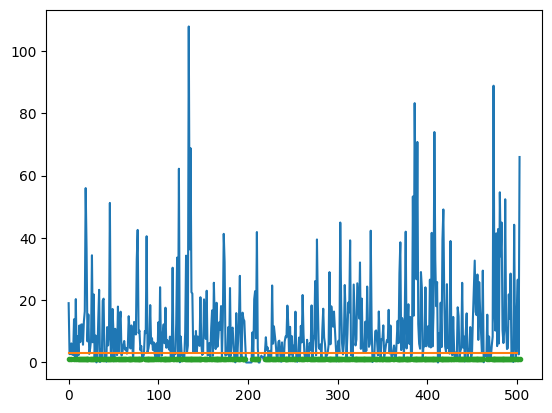

In [18]:
plt.plot(maxilip)
plt.plot([0,500], [3,3])
plt.plot(sel_lip_cells, np.ones(sel_lip_cells.shape[0]),'.')

In [67]:
np.mean(lip_av[i]['Sample averaged'],axis=0)*1000

array([18.4729064 , 18.86699507, 19.16256158, 19.43349754, 19.82758621,
       20.51724138, 21.18226601, 22.21674877, 22.51231527, 23.59605911,
       24.63054187, 25.44334975, 26.47783251, 27.26600985, 27.51231527,
       27.80788177, 27.29064039, 26.45320197, 26.28078818, 24.87684729,
       23.71921182, 22.90640394, 21.67487685, 20.591133  , 19.50738916,
       18.37438424, 17.90640394, 17.8817734 , 17.14285714, 17.16748768,
       17.06896552, 17.19211823, 17.14285714, 17.06896552, 17.68472906,
       18.07881773, 18.20197044, 17.73399015, 18.12807882, 18.44827586,
       18.57142857, 18.49753695, 18.57142857, 18.62068966, 18.12807882,
       17.8817734 , 18.32512315, 18.34975369, 18.30049261, 18.20197044,
       18.34975369, 17.98029557, 17.93103448, 18.07881773, 18.44827586,
       18.39901478, 18.12807882, 18.42364532, 18.22660099, 18.07881773,
       17.85714286, 18.1773399 , 17.78325123, 17.46305419, 17.36453202,
       16.92118227, 16.89655172, 17.04433498, 17.1182266 , 16.84

In [61]:

maxilip =    np.array(list(np.max(np.mean(lip_av[i]['Sample averaged'],axis=0)*1000) for i in range(len(lip_av))))
maxipfc =    np.array(list(np.max(np.mean(pfc_av[i]['Sample averaged'],axis=0)*1000) for i in range(len(pfc_av))))
maxiv4  =    np.array(list(np.max(np.mean(v4_av[i]['Sample averaged'],axis=0)*1000) for i in range(len(v4_av))))

sel_lip_cells   =   np.where(maxilip>10)[0]
sel_pfc_cells   =   np.where(maxipfc>10)[0]
sel_v4_cells    =   np.where(maxiv4>10)[0]

lip_sessions    =   np.zeros(len(sel_lip_cells))
v4_sessions     =   np.zeros(len(sel_v4_cells))
pfc_sessions    =   np.zeros(len(sel_pfc_cells))

lip_sample_id       =   list(lip_av[i]['Sample Id'] for i in sel_lip_cells)
lip_sample_pos      =   list(lip_av[i]['position'] for i in sel_lip_cells)


lip_dates       =   np.array(list(lip_av[i]['name'][:10] for i in sel_lip_cells))
pfc_dates       =   np.array(list(pfc_av[i]['name'][:10] for i in sel_pfc_cells))
v4_dates        =   np.array(list(v4_av[i]['name'][:10] for i in sel_v4_cells))

lip_acti        =   list(lip_av[i]['Sample averaged'] for i in sel_lip_cells)
pfc_acti        =   list(pfc_av[i]['Sample averaged'] for i in sel_pfc_cells)
v4_acti         =   list(v4_av[i]['Sample averaged'] for i in sel_v4_cells)

for i in range(len(lip_dates)-1):
    if lip_dates[i]==lip_dates[i+1]:
        lip_sessions[i+1]=lip_sessions[i]
    elif lip_dates[i]!=lip_dates[i+1]:
        lip_sessions[i+1]=lip_sessions[i]+1 

In [62]:

# rsample =   np.empty([acti_lip.shape[2], acti_lip.shape[0], acti_lip.shape[0]])
# psample =   np.empty([acti_lip.shape[2], acti_lip.shape[0], acti_lip.shape[0]])

# rnull   =   np.empty([acti_lip.shape[2], acti_lip.shape[0], acti_lip.shape[0]])
# pnull   =   np.empty([acti_lip.shape[2], acti_lip.shape[0], acti_lip.shape[0]])


# rpos   =   np.empty([acti_lip.shape[2], acti_lip.shape[0], acti_lip.shape[0]])
# ppos   =   np.empty([acti_lip.shape[2], acti_lip.shape[0], acti_lip.shape[0]])
# cond_sample_in  =   np.where(np.logical_and(sample_id!=0, sample_pos==1))[0]
# cond_sample_out  =   np.where(np.logical_and(sample_id!=0, sample_pos==2))[0]

# cond_null_in    =   np.where(np.logical_and(sample_id==0, sample_pos==1))[0]
# rall_sample=[]
# rall_pos=[]
# rall_null=[]
paired_cells=[]
for ses in np.unique(lip_sessions):
    lip_cells   =    np.where(lip_sessions==ses)[0]
    tmp    =    list(itertools.combinations(lip_cells, 2))
    paired_cells= paired_cells + tmp    
# for i in range(acti_lip.shape[2]):
#     for l in range(acti_lip.shape[0]):
#         for k in range(acti_lip.shape[0]):
            
#             r,p=stats.pearsonr(acti_lip[l, cond_sample_in, i], acti_lip[k, cond_sample_in, i])
#             rsample[i,l,k]=r
#             psample[i,l,k]=p
                        
#             r,p=stats.pearsonr(acti_lip[l, cond_null_in, i], acti_lip[k, cond_null_in, i])
#             rnull[i,l,k]=r
#             pnull[i,l,k]=p
            
#             r,p=stats.pearsonr(acti_lip[l, cond_sample_out, i], acti_lip[k, cond_sample_out, i])
#             rpos[i,l,k]=r
#             ppos[i,l,k]=p
# rall_sample.append(rsample)
# rall_null.append(rnull)
# rall_pos.append(rpos)

In [63]:
len(paired_cells)

651

In [206]:
paired_cells

[(0, 1),
 (2, 3),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (5, 10),
 (6, 7),
 (6, 8),
 (6, 9),
 (6, 10),
 (7, 8),
 (7, 9),
 (7, 10),
 (8, 9),
 (8, 10),
 (9, 10),
 (11, 12),
 (11, 13),
 (11, 14),
 (12, 13),
 (12, 14),
 (13, 14),
 (15, 16),
 (15, 17),
 (15, 18),
 (15, 19),
 (15, 20),
 (15, 21),
 (15, 22),
 (15, 23),
 (15, 24),
 (16, 17),
 (16, 18),
 (16, 19),
 (16, 20),
 (16, 21),
 (16, 22),
 (16, 23),
 (16, 24),
 (17, 18),
 (17, 19),
 (17, 20),
 (17, 21),
 (17, 22),
 (17, 23),
 (17, 24),
 (18, 19),
 (18, 20),
 (18, 21),
 (18, 22),
 (18, 23),
 (18, 24),
 (19, 20),
 (19, 21),
 (19, 22),
 (19, 23),
 (19, 24),
 (20, 21),
 (20, 22),
 (20, 23),
 (20, 24),
 (21, 22),
 (21, 23),
 (21, 24),
 (22, 23),
 (22, 24),
 (23, 24),
 (25, 26),
 (25, 27),
 (25, 28),
 (25, 29),
 (25, 30),
 (25, 31),
 (25, 32),
 (25, 33),
 (25, 34),
 (26, 27),
 (26, 28),
 (26, 29),
 (26, 30),
 (26, 31),
 (26, 32),
 (26, 33),
 (26, 34),
 (27, 28),
 (27, 29),
 (27, 30),
 (27, 

In [220]:
np.where(np.logical_and(lip_sample_id[pair[0]]==0,lip_sample_pos[pair[0]]==1))[0]

array([  4,   6,  14,  17,  23,  31,  34,  38,  51,  52,  63,  65,  70,
        72,  73,  76,  78,  85,  89,  93, 107, 108, 112, 130, 137, 139,
       147, 149, 160, 164, 177, 178, 186, 190, 191, 195, 201, 204, 212,
       213, 214, 224, 226, 234, 240, 244, 247, 253, 262, 266, 269, 274,
       278, 284, 287, 290, 295, 296, 297, 308, 315, 316, 318, 324, 327,
       328, 335, 336, 337, 341, 351, 352, 359, 363, 364, 367, 372, 377,
       378, 382, 390, 391, 393, 398, 399, 406, 407, 410, 411, 413, 416,
       419, 432, 433, 436, 438, 440, 443, 451, 459, 465, 470, 472, 474,
       475, 482], dtype=int64)

In [30]:
pair=paired_cells[2000]
neutral     =   np.where(np.logical_and(lip_sample_id[pair[0]]==0,lip_sample_pos[pair[0]]==1))[0]
nonneutral  =   np.where(np.logical_and(lip_sample_id[pair[0]]!=1,lip_sample_pos[pair[0]]==1))[0]

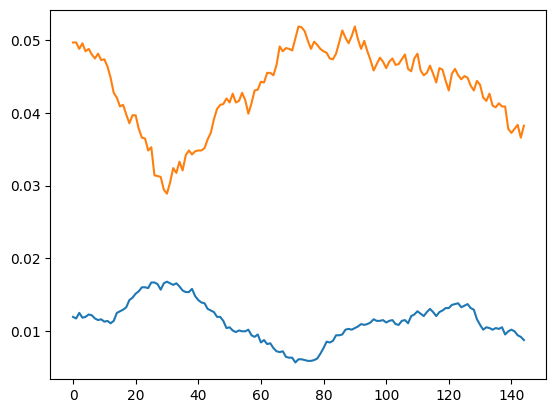

In [36]:
plt.plot(np.mean(lip_acti[pair[0]][neutral,:],axis=0))
plt.plot(np.mean(lip_acti[pair[1]][neutral,:],axis=0))

In [58]:
t=60
r,p=stats.pearsonr(lip_acti[pair[0]][neutral,t], lip_acti[pair[1]][neutral,t])  
r

c:\Users\ibos.g\Anaconda3\envs\Ephysvibe\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


nan

In [60]:
lip_acti[pair[1]][neutral,t]

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.01, 0.02, 0.  , 0.01,
       0.01, 0.  , 0.  , 0.01, 0.01, 0.  , 0.  , 0.01, 0.  , 0.01, 0.01,
       0.  , 0.01, 0.02, 0.02, 0.02, 0.01, 0.01, 0.  , 0.  , 0.01, 0.02,
       0.01, 0.01, 0.02, 0.  , 0.02, 0.02, 0.01, 0.01, 0.01, 0.  , 0.  ,
       0.  , 0.  , 0.02, 0.02, 0.01, 0.01, 0.02, 0.  , 0.01, 0.  , 0.01,
       0.  , 0.01, 0.  ])

  0%|          | 0/145 [00:00<?, ?it/s]c:\Users\ibos.g\Anaconda3\envs\Ephysvibe\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
100%|██████████| 145/145 [00:00<00:00, 12180.78it/s]


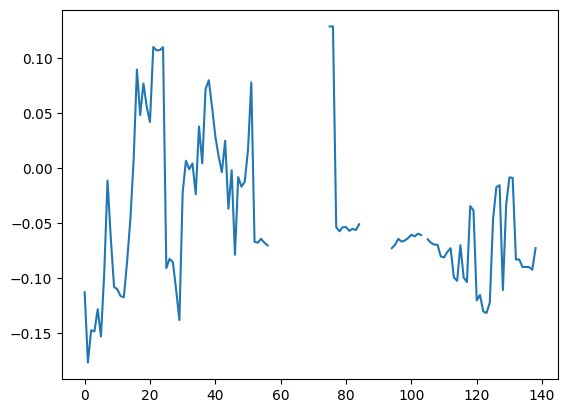

In [51]:
pair=paired_cells[2002]
neutral     =   np.where(np.logical_and(lip_sample_id[pair[0]]==0,lip_sample_pos[pair[0]]==1))[0]
nonneutral  =   np.where(np.logical_and(lip_sample_id[pair[0]]!=1,lip_sample_pos[pair[0]]==1))[0]
tmp=[]
for t in tqdm(range(lip_acti[0].shape[1])):
    r,p=stats.pearsonr(lip_acti[pair[0]][neutral,t], lip_acti[pair[1]][neutral,t])  
    tmp.append(r)

plt.plot(tmp)

In [64]:
rs_n=np.empty([np.array(paired_cells).shape[0],lip_acti[0].shape[1]])
rs_nn=np.empty([np.array(paired_cells).shape[0],lip_acti[0].shape[1]])

for t in tqdm(range(lip_acti[0].shape[1])):
    c=0
    for pair in paired_cells:
        neutral     =   np.where(np.logical_and(lip_sample_id[pair[0]]==0,lip_sample_pos[pair[0]]==1))[0]
        nonneutral  =   np.where(np.logical_and(lip_sample_id[pair[0]]!=1,lip_sample_pos[pair[0]]==1))[0]
        r,p=stats.pearsonr(lip_acti[pair[0]][neutral,t], lip_acti[pair[1]][neutral,t])    
        rs_n[c, t]=r
        r,p=stats.pearsonr(lip_acti[pair[0]][nonneutral,t], lip_acti[pair[1]][nonneutral,t])    
        rs_nn[c, t]=r
        c+=1    

100%|██████████| 145/145 [00:20<00:00,  7.23it/s]


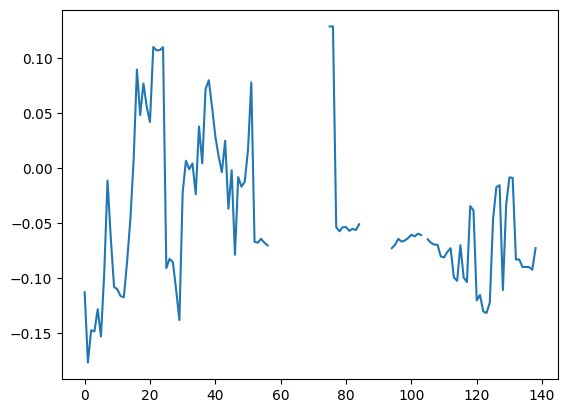

In [50]:
plt.plot(rs_n[2002,:])

In [94]:
np.nanmean(d[20:60,:], axis=0)

array([-5.19561520e-03, -1.46938446e-02, -3.10262406e-02, -3.24689759e-02,
       -4.95239771e-02, -4.26731420e-02, -5.02514349e-02, -3.28109135e-02,
       -2.50988056e-02, -1.54667709e-02,  6.49065465e-04, -7.78506157e-03,
       -9.78766774e-03,  1.18575254e-02,  2.28758864e-02, -2.03211851e-03,
        1.37141767e-02, -7.92202466e-03,  3.41468252e-03,  3.41812040e-03,
        1.07431320e-02,  1.77042620e-02,  1.83721733e-02,  3.04002596e-02,
        2.17852424e-02,  2.23672841e-02, -1.60935887e-03,  1.24892757e-02,
       -2.63753315e-03, -4.95201552e-03,  1.30187542e-02,  1.20406377e-02,
        2.16557561e-02,  1.53094867e-02,  1.31917212e-02,  1.36423178e-02,
        1.39633782e-02,  1.21704264e-02,  1.35373465e-02,  1.89405866e-02,
       -1.16164250e-02, -8.26262334e-03, -4.12742822e-03, -1.71980329e-02,
       -2.76820825e-03,  1.68626770e-02,  4.02126822e-05, -8.52032155e-03,
       -8.10329810e-03, -6.45153684e-03,  6.36711093e-03,  4.72409116e-03,
        2.07978723e-02,  

In [100]:
d=rs_n-rs_nn
s=np.argsort(np.nanmean(d[20:60,:], axis=0))
s

array([  6,   4,   5, 144, 133, 127, 136,  66, 138,   7,   3,   2,  68,
         8, 104, 142, 134, 139, 126, 143, 141, 137,  65, 125, 131, 103,
        43, 140, 128, 129,  67,   9, 130,   1,  80, 132,  73, 116, 113,
       112,  40, 111,  86, 135, 105,  72,  12, 102,  71,  47,  41,  48,
        17,  11,  49,  64,   0,  29,  74,  42,  44,  28,  87, 114,  15,
        26,  79,  46, 124, 107,  10, 106,  70,  69,  88, 117,  18,  19,
        81, 110,  90,  51,  50, 115, 101, 118,  83, 108,  93,  82, 109,
        20,  13,  31,  37,  27,  84,  30,  34,  75, 120,  38,  35,  16,
        92,  77,  36,  89,  33,  91,  62,  45,  21,  85,  63, 121,  22,
        39,  76,  54,  53,  56,  52,  32,  24, 122,  25,  78,  14, 123,
       119,  96,  59, 100,  23,  58,  55,  98,  94,  97,  95,  57,  99,
        61,  60], dtype=int64)

In [116]:
d.shape

(651, 145)

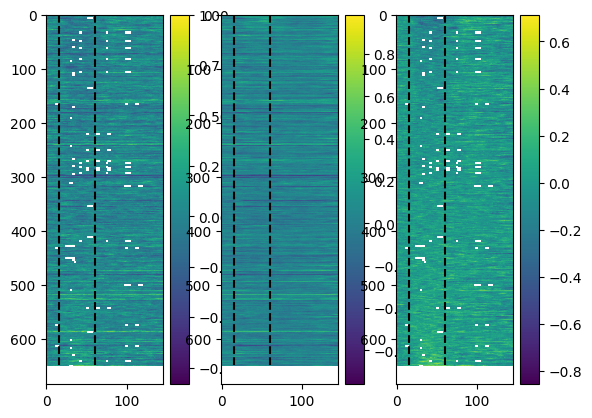

In [118]:
d=rs_n-rs_nn
s=np.argsort(np.nanmean(d[:,20:60], axis=1))
plt.subplot(1,3,1)
plt.imshow(rs_n[s,:], aspect='auto')
plt.plot([15,15], [0, rs_n.shape[0]], '--k')
plt.plot([60,60], [0, rs_n.shape[0]], '--k')
plt.colorbar()

plt.subplot(1,3,2)
plt.imshow(rs_nn[s,:], aspect='auto')
plt.plot([15,15], [0, rs_nn.shape[0]], '--k')
plt.plot([60,60], [0, rs_n.shape[0]], '--k')
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(rs_n[s,:]-rs_nn[s,:], aspect='auto')
plt.plot([15,15], [0, rs_nn.shape[0]], '--k')
plt.plot([60,60], [0, rs_n.shape[0]], '--k')
plt.colorbar()

In [127]:

rs=np.array(rs)
rs.shape[0]/145

80725.0

In [211]:
c=5
plt.plot(rsample[:,0,c])
plt.plot(rpos[:,0,c])
plt.plot(rnull[:,0,c])

IndexError: index 5 is out of bounds for axis 2 with size 5

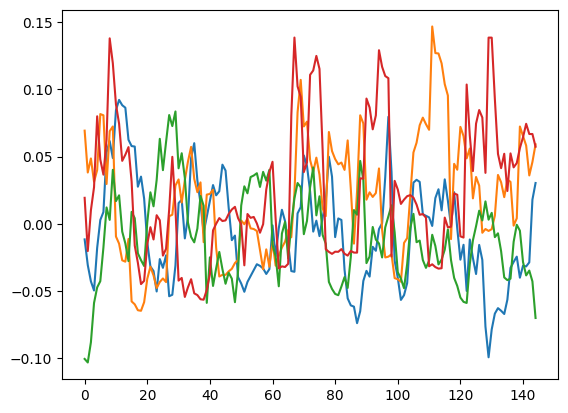

In [159]:
plt.plot((r0[:, 1:,0]))


In [106]:

lip_cells   =   np.where(lip_dates==dates)[0]
pfc_cells   =   np.where(pfc_dates==dates)[0]
v4_cells    =   np.where(v4_dates==dates)[0]

acti_lip    =    np.array(list(lip_av[lip_cell]['Sample averaged'] for lip_cell in lip_cells))
acti_pfc    =    np.array(list(pfc_av[pfc_cell]['Sample averaged'] for pfc_cell in pfc_cells))
acti_v4     =    np.array(list(v4_av[v4_cell]['Sample averaged'] for v4_cell in v4_cells))

sample_id   =    pfc_av[pfc_cells[0]]['Sample Id']
sampel_pos  =    pfc_av[pfc_cells[0]]['position']

pair_lip=[]
r0=[]
p0=[]

for i in range(acti_lip.shape[2]):
    r,p=stats.pearsonr(acti_lip[0, :,i], acti_lip[1,:,i])
    r0.append(r)
    p0.append(p)

ValueError: x and y must have the same length.

In [215]:
for count, dates in np.unique(lip_dates):
    print(count)

ValueError: too many values to unpack (expected 2)

In [220]:

rall_sample=[]
rall_pos=[]
rall_null=[]
for dates in np.unique(lip_dates):
    
    lip_cells   =   np.where(lip_dates==dates)[0]
    pfc_cells   =   np.where(pfc_dates==dates)[0]
    v4_cells    =   np.where(v4_dates==dates)[0]
    
    acti_lip    =    np.array(list(lip_av[lip_cell]['Sample averaged'] for lip_cell in lip_cells))
    acti_pfc    =    np.array(list(pfc_av[pfc_cell]['Sample averaged'] for pfc_cell in pfc_cells))
    acti_v4     =    np.array(list(v4_av[v4_cell]['Sample averaged'] for v4_cell in v4_cells))

    sample_id   =    lip_av[lip_cells[0]]['Sample Id']
    sample_pos  =    lip_av[lip_cells[0]]['position']
    
    rsample =   np.empty([acti_lip.shape[2], acti_lip.shape[0], acti_lip.shape[0]])
    psample =   np.empty([acti_lip.shape[2], acti_lip.shape[0], acti_lip.shape[0]])

    rnull   =   np.empty([acti_lip.shape[2], acti_lip.shape[0], acti_lip.shape[0]])
    pnull   =   np.empty([acti_lip.shape[2], acti_lip.shape[0], acti_lip.shape[0]])


    rpos   =   np.empty([acti_lip.shape[2], acti_lip.shape[0], acti_lip.shape[0]])
    ppos   =   np.empty([acti_lip.shape[2], acti_lip.shape[0], acti_lip.shape[0]])

    cond_sample_in  =   np.where(np.logical_and(sample_id!=0, sample_pos==1))[0]
    cond_sample_out  =   np.where(np.logical_and(sample_id!=0, sample_pos==2))[0]

    cond_null_in    =   np.where(np.logical_and(sample_id==0, sample_pos==1))[0]
    for i in range(acti_lip.shape[2]):
        for l in range(acti_lip.shape[0]):
            for k in range(acti_lip.shape[0]):
                
                r,p=stats.pearsonr(acti_lip[l, cond_sample_in, i], acti_lip[k, cond_sample_in, i])
                rsample[i,l,k]=r
                psample[i,l,k]=p
                            
                r,p=stats.pearsonr(acti_lip[l, cond_null_in, i], acti_lip[k, cond_null_in, i])
                rnull[i,l,k]=r
                pnull[i,l,k]=p
                
                r,p=stats.pearsonr(acti_lip[l, cond_sample_out, i], acti_lip[k, cond_sample_out, i])
                rpos[i,l,k]=r
                ppos[i,l,k]=p
    rall_sample.append(rsample)
    rall_null.append(rnull)
    rall_pos.append(rpos)



ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (13,) + inhomogeneous part.

In [222]:
dates

'2022-12-01'

In [164]:
np.unique(pfc_dates)

array(['2022-11-22', '2022-11-28', '2022-11-30', '2022-12-01',
       '2022-12-02', '2022-12-05', '2022-12-06', '2022-12-13',
       '2022-12-14', '2022-12-16', '2023-01-18', '2023-01-20',
       '2023-01-23', '2023-01-26', '2023-02-08', '2023-02-09',
       '2023-02-24', '2023-02-27', '2023-02-28', '2023-03-01',
       '2023-03-03', '2023-03-06', '2023-03-07', '2023-03-09',
       '2023-03-10', '2023-03-14', '2023-03-16', '2023-03-17',
       '2023-03-20', '2023-03-21', '2023-03-22', '2023-03-30',
       '2023-10-06', '2023-10-09', '2023-10-10', '2023-10-12',
       '2023-10-17', '2023-10-18', '2023-10-26', '2023-11-16',
       '2023-11-17', '2023-11-20', '2023-11-22', '2023-11-23',
       '2023-11-24', '2023-11-28', '2023-11-29', '2023-11-30',
       '2023-12-06', '2023-12-07', '2023-12-13'], dtype='<U10')

In [170]:
lip_dates

['2022-12-01',
 '2022-12-01',
 '2022-12-01',
 '2022-12-01',
 '2022-12-01',
 '2022-11-22',
 '2022-11-22',
 '2022-11-22',
 '2022-11-22',
 '2022-11-22',
 '2022-11-30',
 '2022-11-30',
 '2022-11-30',
 '2022-11-30',
 '2022-11-30',
 '2022-11-30',
 '2022-11-30',
 '2022-11-30',
 '2023-02-09',
 '2023-02-09',
 '2023-02-09',
 '2023-02-09',
 '2022-12-02',
 '2022-12-02',
 '2022-12-02',
 '2022-12-02',
 '2022-12-02',
 '2022-12-02',
 '2022-12-02',
 '2022-12-02',
 '2022-12-02',
 '2022-12-02',
 '2022-12-02',
 '2022-12-02',
 '2022-12-02',
 '2022-12-02',
 '2022-12-02',
 '2022-12-02',
 '2022-12-02',
 '2022-12-02',
 '2022-12-05',
 '2022-12-05',
 '2022-12-05',
 '2022-12-05',
 '2022-12-05',
 '2022-12-05',
 '2022-12-05',
 '2022-12-05',
 '2022-12-05',
 '2022-12-05',
 '2022-12-05',
 '2022-12-05',
 '2022-12-05',
 '2022-12-05',
 '2022-12-05',
 '2022-12-05',
 '2022-12-05',
 '2022-12-05',
 '2022-12-05',
 '2022-12-14',
 '2022-12-14',
 '2022-12-14',
 '2022-12-14',
 '2022-12-14',
 '2022-12-14',
 '2022-12-14',
 '2022-12-

In [169]:
lip_dates

['2022-12-01',
 '2022-12-01',
 '2022-12-01',
 '2022-12-01',
 '2022-12-01',
 '2022-11-22',
 '2022-11-22',
 '2022-11-22',
 '2022-11-22',
 '2022-11-22',
 '2022-11-30',
 '2022-11-30',
 '2022-11-30',
 '2022-11-30',
 '2022-11-30',
 '2022-11-30',
 '2022-11-30',
 '2022-11-30',
 '2023-02-09',
 '2023-02-09',
 '2023-02-09',
 '2023-02-09',
 '2022-12-02',
 '2022-12-02',
 '2022-12-02',
 '2022-12-02',
 '2022-12-02',
 '2022-12-02',
 '2022-12-02',
 '2022-12-02',
 '2022-12-02',
 '2022-12-02',
 '2022-12-02',
 '2022-12-02',
 '2022-12-02',
 '2022-12-02',
 '2022-12-02',
 '2022-12-02',
 '2022-12-02',
 '2022-12-02',
 '2022-12-05',
 '2022-12-05',
 '2022-12-05',
 '2022-12-05',
 '2022-12-05',
 '2022-12-05',
 '2022-12-05',
 '2022-12-05',
 '2022-12-05',
 '2022-12-05',
 '2022-12-05',
 '2022-12-05',
 '2022-12-05',
 '2022-12-05',
 '2022-12-05',
 '2022-12-05',
 '2022-12-05',
 '2022-12-05',
 '2022-12-05',
 '2022-12-14',
 '2022-12-14',
 '2022-12-14',
 '2022-12-14',
 '2022-12-14',
 '2022-12-14',
 '2022-12-14',
 '2022-12-

In [167]:
np.where(lip_dates==dates)

(array([], dtype=int64),)

In [157]:
lipsessions=np.zeros(np.unique(lip_dates))
pfcsessions=np.empty(np.unique(pfc_dates))
v4sessions=np.empty(np.unique(v4_dates))
for date in np.unique(lip_dates):
    lipsessions[np.where(lip_dates==date)]

2022-11-22
2022-11-30
2022-12-01
2022-12-02
2022-12-05
2022-12-14
2022-12-16
2023-01-18
2023-01-20
2023-01-23
2023-01-26
2023-02-08
2023-02-09
2023-02-24
2023-02-27
2023-03-03
2023-03-06
2023-03-07
2023-03-16
2023-03-17
2023-03-20
2023-03-21
2023-10-10
2023-10-12
2023-10-17
2023-10-18
2023-10-26
2023-11-16
2023-11-17
2023-11-20
2023-11-22
2023-11-23
2023-11-24
2023-11-28
2023-11-29
2023-11-30
2023-12-06
2023-12-13


In [146]:
lip_dates[133]

'2022-12-01'

In [149]:
np.where(np.unique(lip_dates)[3]==lip_dates)[0]

array([22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39], dtype=int64)

In [139]:
np.where(lip_dates==np.unique(lip_dates)[1])

(array([10, 11, 12, 13, 14, 15, 16, 17], dtype=int64),)

In [134]:
lip_dates=np.array(lip_dates)
pfc_dates=np.array(pfc_dates)
v4_dates=np.array(v4_dates)
np.where(pfc_dates==lip_dates[0])

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37, 750,
        751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763,
        764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776,
        777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789,
        790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802,
        803, 804, 805, 806, 807, 808, 809, 810], dtype=int64),)